# Generate speech from long text

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/tts-long-text](https://github.com/huseinzol05/malaya-speech/tree/master/example/tts-long-text).
    
</div>

<div class="alert alert-warning">

This module is not language independent, so it not save to use on different languages. Pretrained models trained on hyperlocal languages.
    
</div>

<div class="alert alert-warning">

This is an application of malaya-speech Pipeline, read more about malaya-speech Pipeline at [malaya-speech/example/pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/pipeline).
    
</div>

In [1]:
import malaya_speech
import numpy as np
from malaya_speech import Pipeline
import matplotlib.pyplot as plt
import IPython.display as ipd

### TTS model

We are going to use FastSpeech2, really fast and accurate.

### List available FastSpeech2

In [2]:
malaya_speech.tts.available_fastspeech2()

INFO:root:`husein` combined loss from training set


,Size (MB),Quantized Size (MB),Combined loss
male,125.0,31.7,1.8460
male-v2,65.5,16.7,1.8860
female,125.0,31.7,1.7440
female-v2,65.5,16.7,1.8040
husein,125.0,31.7,0.6411
husein-v2,65.5,16.7,0.7712


### Load FastSpeech2 model

In [3]:
male = malaya_speech.tts.fastspeech2(model = 'male')

### Load Vocoder model

I will use MelGAN in this example. **But, make sure speakers are same. If use female fastspeech2, need to use female MelGAN also**.

In [4]:
vocoder_male = malaya_speech.vocoder.melgan(model = 'male')

### Load sentence tokenizer

We are going to use Malaya sentence tokenizer, can split even for very complex pattern, https://malaya.readthedocs.io/en/latest/load-tokenizer.html#Sentence-tokenizer

Make sure installed Malaya first,

```bash
pip3 install malaya
```

In [5]:
import malaya

In [6]:
long_text = """
SHAH ALAM - Pertubuhan Kebajikan Anak Bersatu Selangor (PKABS) bersetuju pihak kerajaan mewujudkan Suruhanjaya Siasatan Diraja (RCI) untuk menyiasat isu kartel daging.

Pengerusinya, Rahmadin Alimuddin berkata, perkara tersebut perlu disiasat sebaiknya kerana isu logo halal palsu membimbangkan umat Islam di negara ini.

Menurutnya, siasatan juga dapat memastikan pembekal daging beku mengikut piawaian yang ditetapkan oleh kerajaan Malaysia sebelum menjualnya di pasaran.

“Saya berharap pihak yang menyiasat isu daging kartel dapat menyelesaikan isu ini dengan adil supaya rakyat Malaysia tidak ragu dengan daging beku yang berada di pasaran,” katanya ketika dihubungi Sinar Harian pada Sabtu.

Terdahulu, Rahmadin dan Presiden Gagasan Baru Harapan Malaysia (GBHM), Mohd Zulfitri Mohd Basir telah menghantar memorandum kepada Suruhanjaya Pencegahan Rasuah Malaysia (SPRM) bagi meminta pihak tersebut menjalankan siasatan berkenaan kes kartel daging import haram di Senai, Johor awal Disember lalu.

Penyerahan memorandum tersebut meminta pihak berkuasa mendedahkan kartel yang terlibat dalam sindiket itu selain meminta penjelasan daging tersebut boleh terlepas daripada pihak berkuasa.
"""

### Use Pipeline

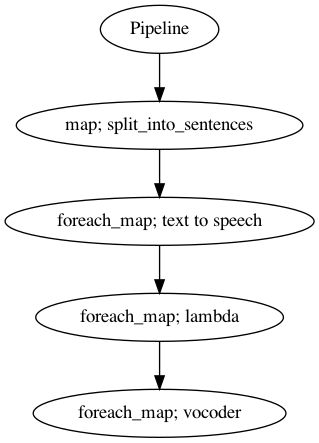

In [7]:
p = Pipeline()
pipeline = (
    p.map(malaya.text.function.split_into_sentences)
    .foreach_map(male)
    .foreach_map(lambda x: x['postnet-output'])
    .foreach_map(vocoder_male)
)
p.visualize()

In [15]:
%%time

r = p(long_text)
concated = np.concatenate(r['vocoder'])

CPU times: user 26.5 s, sys: 3.28 s, total: 29.8 s
Wall time: 6.08 s


In [14]:
ipd.Audio(concated, rate = 22050)